# ROCK PAPER SCISSORS
### (hand gesture recognition)


The goal of the project was to develop an image classifier that was able to correctly classify the three gestures of the well-known rock paper scissors game. The starting dataset was found on kaggle.com. https://www.kaggle.com/datasets/drgfreeman/rockpaperscis It is composed of 712, 726 and 750 images respectively for the gestures of paper, rock and scissors.

The initial challenge was to try to extract features from the images, usable for machine learning algorithms. I used different approaches:

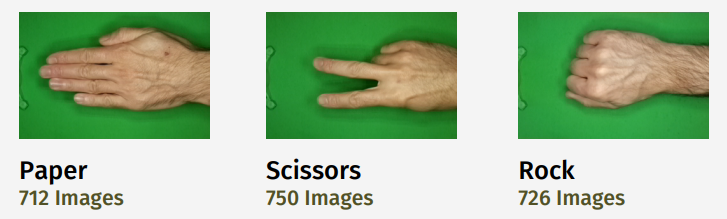

## Data Transformation

In [1]:
import numpy as np
from PIL import Image
import os
import pandas as pd
import cv2
import mediapipe as mp

In [2]:
path_raw_data = 'C:/Users/matte/RockPaperScissorsData/RawDataSet'
path_pixel = 'C:/Users/matte/RockPaperScissorsData/pixel_csv'
path_landmarks = 'C:/Users/matte/RockPaperScissorsData/landmarks_csv'
path_distances = 'C:/Users/matte/RockPaperScissorsData/distances_csv'

### Creating DataSet that have Pixel Values as Features

In the initial dataset the images have a resolution of 300x200 pixels. What I did was resize them, making them smaller by 90% thus bringing them to a size of 30x20 pixels and subsequently transforming them into grayscale, since the color is not a relevant information for the purpose of classification. Then I built the dataset by setting the normalized pixel value (divided by 255) as features, obtaining a dataset of 2188 records and 600 features for each record.

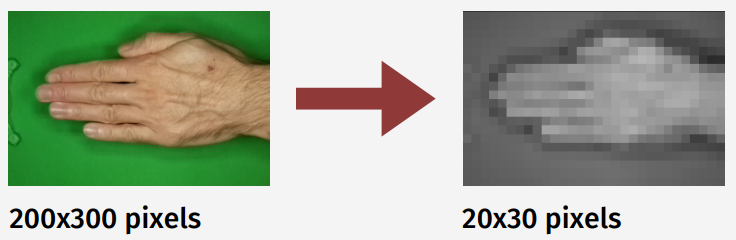

In [3]:
def img_to_pixel(img, resize_x, resize_y):
    #convert in gray scale
    img = img.convert("L")
    img = img.resize((resize_x, resize_y))
    #normalize 0-1
    img_array = np.asarray(img) / 255
    img_array = img_array.reshape(1, resize_x * resize_y)
    return img_array

def create_csv_pixel(gesture, path_data, path_output,  resize_x, resize_y):
    path = path_data + '/' + gesture
    df = pd.DataFrame()
    count = 0
    for filename in os.listdir(path):
        count = count + 1
        img_path = os.path.join(path, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path, 'r')
            img_array = img_to_pixel(img, resize_x, resize_y)
            df = pd.concat([df, pd.DataFrame(img_array)])

    print(df)
    df.to_csv(path_output + '/' + gesture + '.csv', index = False, header = False)

In [4]:
resize_x = 30
resize_y = 20
create_csv_pixel('paper', path_raw_data, path_pixel, resize_x, resize_y)
create_csv_pixel('scissors', path_raw_data, path_pixel, resize_x, resize_y)
create_csv_pixel('rock', path_raw_data, path_pixel, resize_x, resize_y)

         0         1         2         3         4         5         6    \
0   0.439216  0.447059  0.458824  0.474510  0.482353  0.494118  0.501961   
0   0.325490  0.329412  0.337255  0.349020  0.352941  0.360784  0.368627   
0   0.337255  0.337255  0.341176  0.352941  0.360784  0.364706  0.372549   
0   0.266667  0.290196  0.309804  0.325490  0.333333  0.345098  0.352941   
0   0.274510  0.301961  0.321569  0.337255  0.345098  0.356863  0.364706   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.325490  0.329412  0.337255  0.352941  0.352941  0.360784  0.364706   
0   0.443137  0.454902  0.466667  0.474510  0.486275  0.494118  0.498039   
0   0.411765  0.415686  0.423529  0.435294  0.447059  0.454902  0.462745   
0   0.329412  0.333333  0.341176  0.352941  0.360784  0.368627  0.372549   
0   0.329412  0.333333  0.341176  0.352941  0.360784  0.368627  0.372549   

         7         8         9    ...       590       591       592       593  \
0   0.

### MediaPipe Hand Landmarker - Google model

Using the library developed by Google 'MediaPipe Hand Landmarker' it is possible to extract 21 landmarks from an image of a hand. Each landmark is composed of 3 values, the coordinates along the 3 axes. In order to stay low with the number of features, I discarded the depth information, keeping the other two. In doing so I obtained a dataset composed of 2091 records and 42 features. The number of records is smaller than the number of starting images because the Google model failed to capture the landmarks of some images (probably because the hand inside the image was not positioned completely inside).

### Creating DataSet that have Landmarks as Features

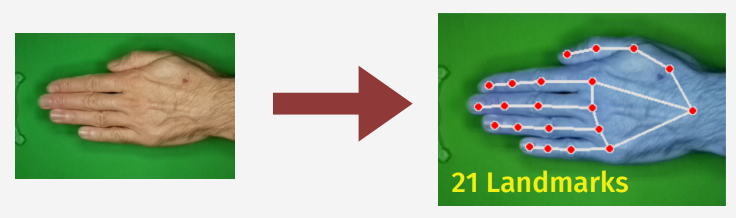

In [5]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands = 1)
mpDraw = mp.solutions.drawing_utils

In [6]:
def img_to_landmarks(image):
    results = hands.process(image)
    if results.multi_hand_landmarks:
        landmarks_list = []
        for num, lm in enumerate(results.multi_hand_landmarks[0].landmark):
            #h = image.shape[0]
            #w = image.shape[1]
            x, y = lm.x, lm.y
            landmarks_list.append(x)
            landmarks_list.append(y)
        np_array = np.asarray(landmarks_list)
        np_array = np_array.reshape(1, 42)
        return np_array

def create_csv_landmarks(gesture, path_data, path_output):
    path = path_data + '/' + gesture
    df = pd.DataFrame()
    count = 0
    for filename in os.listdir(path):
        count = count + 1
        img_path = os.path.join(path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            df = pd.concat([df, pd.DataFrame(img_to_landmarks(img))])
    print(df)
    df.to_csv(path_output + '/' + gesture + '.csv', index=False, header=False)

In [7]:
create_csv_landmarks('paper', path_raw_data, path_landmarks)
create_csv_landmarks('scissors', path_raw_data, path_landmarks)
create_csv_landmarks('rock', path_raw_data, path_landmarks)

          0         1         2         3         4         5         6   \
0   0.877535  0.553092  0.810970  0.355909  0.691859  0.273271  0.568609   
0   0.872601  0.496521  0.800457  0.285218  0.681818  0.173996  0.554215   
0   0.956954  0.473283  0.867495  0.684498  0.762684  0.751004  0.666774   
0   0.908083  0.769840  0.820190  0.547266  0.690961  0.458610  0.558354   
0   0.872230  0.665406  0.804361  0.436932  0.684354  0.308975  0.556965   
..       ...       ...       ...       ...       ...       ...       ...   
0   1.002240  0.481538  0.906475  0.712505  0.756998  0.789051  0.613013   
0   1.060631  0.480361  0.953581  0.643001  0.837772  0.719307  0.746379   
0   0.966311  0.413701  0.921966  0.660359  0.819968  0.828880  0.716944   
0   0.886380  0.500681  0.748859  0.732918  0.599739  0.786450  0.460260   
0   0.977466  0.532283  0.859875  0.756902  0.702622  0.801630  0.558213   

          7         8         9   ...        32        33        34        35  \
0   0.

### Creating DataSet that have Distances as Features

Another technique I thought of was to take the distances between specific landmarks as features, the ones that I think are most useful to the problem. Then the distances between the landmark (4, 2), (5, 8), (9, 12), (13, 16) and (17, 20). In doing so I built a dataset, again with 2091 records but only 5 features.

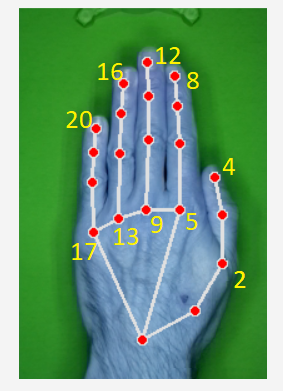

In [8]:
def image_to_distance(image):
    results = hands.process(image)

    if results.multi_hand_landmarks:
        lms = results.multi_hand_landmarks[0]
        distance_list = []
        points = [(4, 2), (5, 8), (9, 12), (13, 16), (17, 20)]
        for a, b in points:
            #dx = pow(int(lms.landmark[a].x * image_w) - int(lms.landmark[b].x * image_w), 2)
            #dy = pow(int(lms.landmark[a].y * image_h) - int(lms.landmark[b].y * image_h), 2)
            dx = pow(lms.landmark[a].x - lms.landmark[b].x, 2)
            dy = pow(lms.landmark[a].y - lms.landmark[b].y, 2)
            d = pow((dx + dy), 0.5)
            distance_list.append(d)
        np_array = np.asarray(distance_list).reshape(1, 5)
        return np_array


def create_distances_csv(gesture, path_data, path_output):
    path = path_data + '/' + gesture
    df = pd.DataFrame()
    count = 0
    for filename in os.listdir(path):
        count = count + 1
        img_path = os.path.join(path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            df = pd.concat([df, pd.DataFrame(image_to_distance(img))])
    print(df)
    df.to_csv(path_output + '/' + gesture + '.csv', index=False, header=False)

In [9]:
create_distances_csv('paper', path_raw_data, path_distances)
create_distances_csv('scissors', path_raw_data, path_distances)
create_distances_csv('rock', path_raw_data, path_distances)

           0         1         2         3         4
0   0.221898  0.336983  0.368536  0.338289  0.264182
0   0.230263  0.364242  0.393827  0.363688  0.283044
0   0.179272  0.329340  0.368602  0.344370  0.268935
0   0.232019  0.386897  0.414542  0.383405  0.291144
0   0.229035  0.387751  0.402023  0.364485  0.276847
..       ...       ...       ...       ...       ...
0   0.255258  0.378256  0.402581  0.385514  0.313735
0   0.200318  0.302739  0.331915  0.300585  0.232615
0   0.266234  0.344555  0.363028  0.353895  0.267224
0   0.241663  0.388219  0.422308  0.386465  0.308686
0   0.253373  0.384090  0.411173  0.378845  0.303952

[692 rows x 5 columns]
           0         1         2         3         4
0   0.214105  0.378158  0.415628  0.107387  0.126492
0   0.198532  0.376752  0.414344  0.187828  0.186411
0   0.294780  0.458892  0.497816  0.204270  0.196169
0   0.265832  0.390337  0.403549  0.105361  0.107640
0   0.246373  0.376841  0.403621  0.179730  0.181399
..       ...       ...

## Data Augmentation

In the initial collection of images the hands are pointing the same direction so consequently the models trained on Datasets built on pixels and landmarks will eventually be 'good' with images in which the hand is pointing the same direction. In the case of the Dataset built with distances, on the other hand, we will plausibly have independence on the positioning of the hand.
To increase the generality of the models I tried to do some data augmentation on the collection of images by rotating them. First I had to add 50 pixel padding, to make the images square and then rotate them 90 degrees 3 times. Obtaining a total of 8752 images of which 2848 paper, 2904 rock and 3000 scissors.

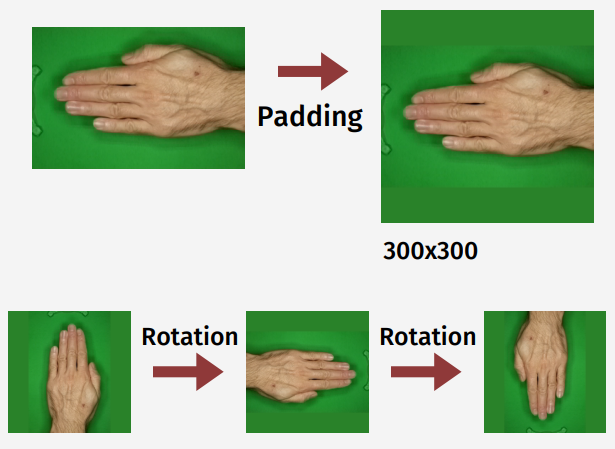

In [ ]:
import os
import cv2

# Define the padding values (in pixels)
top = 50
bottom = 50
left = 0
right = 0

for gesture in ['paper', 'rock', 'scissors']:
    input_dir = "C:/Users/matte/RockPaperScissorsData/RawDataSet/" + gesture
    output_dir = "C:/Users/matte/RockPaperScissorsData/AugmentedDataset/" + gesture
    
    # Loop through all the files in the input directory
    for filename in os.listdir(input_dir):
        
        # Read the image file using OpenCV
        img = cv2.imread(os.path.join(input_dir, filename))

        # Modify the image as desired
        img_with_padding = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value = (41, 130, 41))
        
        rotated_img1 = cv2.rotate(img_with_padding, cv2.ROTATE_90_CLOCKWISE)
        rotated_img2 = cv2.rotate(rotated_img1, cv2.ROTATE_90_CLOCKWISE)
        rotated_img3 = cv2.rotate(rotated_img2, cv2.ROTATE_90_CLOCKWISE)

        # Create the output filename
        filename1 = filename[:-4] + '_rotated1.png'
        filename2 = filename[:-4] + '_rotated2.png'
        filename3 = filename[:-4] + '_rotated3.png'

        # Save the modified image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), img_with_padding)
        cv2.imwrite(os.path.join(output_dir, filename1), rotated_img1)
        cv2.imwrite(os.path.join(output_dir, filename2), rotated_img2)
        cv2.imwrite(os.path.join(output_dir, filename3), rotated_img3)

From this augmented collection of images I created two new datasets with the same pixel and landmarks techniques already used. The only difference was in the resizing of the image, now having 300x300 pixel resolution images, they have been resized 25x25 pixels.
In doing so I obtained a Dataset of 8752 records and 625 features with the pixel technique and a Dataset of 4219 records and 42 features with landmarks.

### Creating analogue DataSets starting from Augmented Data

In [10]:
path_augmented_data = 'C:/Users/matte/RockPaperScissorsData/AugmentedDataSet'
path_augmented_pixel = 'C:/Users/matte/RockPaperScissorsData/augmented_pixel_csv'
path_augmented_landmarks = 'C:/Users/matte/RockPaperScissorsData/augmented_landmarks_csv'

### Pixel

In [11]:
resize_x = 25
resize_y = 25
create_csv_pixel('paper', path_augmented_data, path_augmented_pixel, resize_x, resize_y)
create_csv_pixel('scissors', path_augmented_data, path_augmented_pixel, resize_x, resize_y)
create_csv_pixel('rock', path_augmented_data, path_augmented_pixel, resize_x, resize_y)

         0         1         2         3         4         5         6    \
0   0.364706  0.364706  0.364706  0.364706  0.364706  0.364706  0.364706   
0   0.364706  0.364706  0.364706  0.364706  0.435294  0.462745  0.470588   
0   0.364706  0.364706  0.364706  0.364706  0.364706  0.364706  0.364706   
0   0.364706  0.364706  0.364706  0.364706  0.407843  0.431373  0.450980   
0   0.364706  0.364706  0.364706  0.364706  0.364706  0.364706  0.364706   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.364706  0.364706  0.364706  0.364706  0.349020  0.352941  0.360784   
0   0.364706  0.364706  0.364706  0.364706  0.364706  0.364706  0.364706   
0   0.364706  0.364706  0.364706  0.364706  0.345098  0.349020  0.356863   
0   0.364706  0.364706  0.364706  0.364706  0.364706  0.364706  0.364706   
0   0.364706  0.364706  0.364706  0.364706  0.349020  0.352941  0.364706   

         7         8         9    ...       615       616       617       618  \
0   0.

### Landmarks

In [12]:
create_csv_landmarks('paper', path_augmented_data, path_augmented_landmarks)
create_csv_landmarks('scissors', path_augmented_data, path_augmented_landmarks)
create_csv_landmarks('rock', path_augmented_data, path_augmented_landmarks)

          0         1         2         3         4         5         6   \
0   0.839202  0.564974  0.750965  0.357214  0.654837  0.263277  0.569570   
0   0.111559  0.460414  0.183906  0.593246  0.306568  0.647598  0.429654   
0   0.883739  0.501571  0.808252  0.360055  0.681924  0.289287  0.553770   
0   0.112956  0.496106  0.186935  0.635104  0.313772  0.705442  0.444891   
0   0.927270  0.478650  0.858916  0.618418  0.747985  0.661662  0.644537   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.063622  0.537204  0.090727  0.382132  0.179965  0.276552  0.270469   
0   0.838491  0.511856  0.737736  0.665765  0.587631  0.701849  0.446480   
0   0.159663  0.484315  0.259121  0.331963  0.409437  0.297607  0.549442   
0   0.924089  0.520022  0.830799  0.669753  0.688716  0.696547  0.554386   
0   0.080150  0.476889  0.169551  0.328541  0.310837  0.301862  0.444549   

          7         8         9   ...        32        33        34        35  \
0   0.